# Noise Interferometry Test
This tests the functionality of the noise interferometry module of ooipy

## Sections
- Compute Cross Correlation for specified window

First, let's import all dependancies

In [1]:
import os
import sys
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
from matplotlib import pyplot as plt
import scipy

cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
from ooipy.hydrophone import Noise_Interferometry

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Compute Cross Correlation for Specified Window

In [23]:
num_periods = 1
avg_time = 1 #minutes
start_time = datetime.datetime(2017,3,10,0,0,0) # time of first sample
node1 = '/LJ01C'
node2 = '/PC01A'
filter_data = False

In [29]:
# Average Cross Correlation Over Specified time
NCF = Noise_Interferometry.calculate_NCF(node1, node2, avg_time, start_time, loop=False, filter_data=True)

Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering Data...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 52.71817708015442 




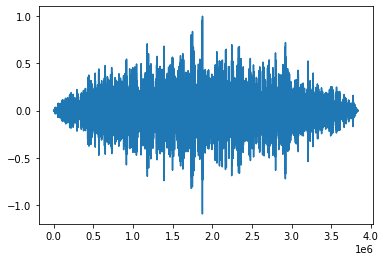

In [31]:
plt.plot(NCF[0,:])

# Debugging New Structure

In [5]:
import os
import sys

cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
from ooipy.hydrophone import Noise_Interferometry

import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
from matplotlib import pyplot as plt


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
avg_time = 1 #minutes
start_time = datetime.datetime(2017,3,10,0,0,0) # time of first sample
node1 = '/LJ01C'
node2 = '/PC01A'
filter_cutoffs = np.array([20, 30])
W = 30

NCF0 = Noise_Interferometry.NCF(avg_time, start_time, node1, node2, filter_cutoffs, W, verbose=True)

In [7]:
NCF0 = Noise_Interferometry.get_audio(NCF0)

   Getting Audio from Node 1...
   Getting Audio from Node 2...


In [7]:
NCF0 = Noise_Interferometry.preprocess_audio(NCF0)

   Filtering Data...
   Whitening Data...


In [8]:
NCF0 = Noise_Interferometry.calc_xcorr(NCF0)

   Correlating Data...


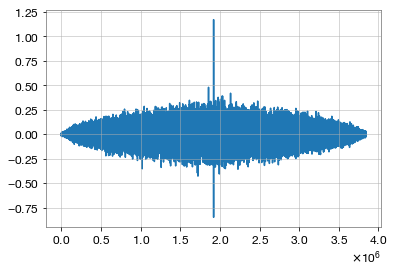

In [9]:
plt.plot(NCF0.NCF)

In [16]:
raw_data = NCF0.node1_data
processed_data = NCF0.node1_processed_data

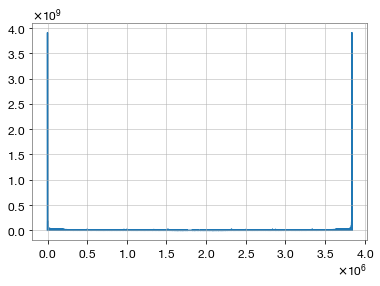

In [24]:
plt.plot(np.abs(scipy.fft.fft(raw_data)))

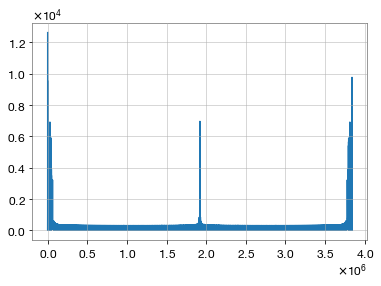

In [23]:
plt.plot(np.abs(scipy.fft.fft(np.ndarray.flatten(processed_data))))

# Debugging NCF_Loop

In [12]:
import os
import sys

cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
from ooipy.hydrophone import Noise_Interferometry as NI

import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
from matplotlib import pyplot as plt


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
avg_time = 1 #minutes
start_time = datetime.datetime(2017,3,10,0,0,0) # time of first sample
node1 = '/LJ01C'
node2 = '/PC01A'
filter_cutoffs = np.array([20, 30])
W = 30
num_periods = 2

NI.calculate_NCF_loop(num_periods, node1, node2, avg_time, start_time, W, filter_cutoffs, verbose=True)

Calculting NCF for Period 1:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
    Filtering and Whitening Data for Node 1...
    Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 49.05491614341736 


Calculting NCF for Period 2:
   Getting Audio from Node 1...
